/Users/karen/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/karen/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


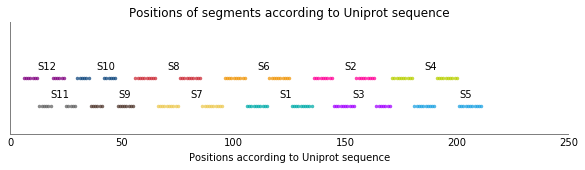

1891 unique mutations across all segments
238 natural unique mutations across all segments
There are 231 single mutations with known effects. They are found in 120 positions


Now the following variables are available:

- data: all data as a (sorted) dictionary in the form: 'segment_name': 'segment_data_as_pandas_dataframe'

- unique_single_mutations: a dictionary with all single mutations for every segment

- data_singles: a sorted dictionary in the form: 'segment_name': 'segment_data_as_pandas_dataframe' for genotypes containing a single substitution

- single_mut_fitness_dict: a dictionary in the form: 'single mutation' : 'fitness'

- data_known_mutations_only - a sorted dictionary in the form: 'segment_name': 'segment_data_as_pandas_dataframe', 
but only for those genotypes that consist of mutations with known effects (single mutant is measured).
For this dictionary, epistasis is measured for every genotype.



/Users/karen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [1]:
%run 'ks01_Data_import.ipynb'
notebook_prefix = 'ks02'
image_counter = Counter()

### Positions

In [3]:
title = 'Positions of segments according to alignment'
plot_better(grid='', height=2)
old_y = 2
for row in positions.iterrows():
    for position in row[1].positions_alignment:
        new_y = np.random.choice([1,2])
        while new_y == old_y:
            new_y = np.random.choice([1,2])
    x = row[1].positions_alignment
    plt.plot(x, [new_y for e in x], '.', lw=3, alpha=0.7, label=row[1].segment, color=segment_colors[row[1].segment])
    plt.text(np.median(x), new_y + 0.3, row[1].segment)
    old_y = new_y
plt.ylim(0,4)
plt.yticks([])
plt.xlabel('Positions according to the aligment')
plt.title(title)
save_image(image_counter, title, figures_folder, notebook_prefix)

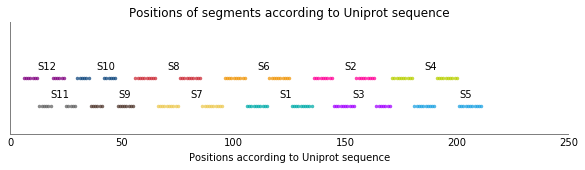

In [4]:
title = 'Positions of segments according to Uniprot sequence'
plot_better(grid='', height=2)
old_y = 2
for row in positions.iterrows():
    for position in row[1].positions_Uniprot_P06633:
        new_y = np.random.choice([1,2])
        while new_y == old_y:
            new_y = np.random.choice([1,2])
    x = row[1].positions_Uniprot_P06633
    plt.plot(x, [new_y for e in x], '.', lw=3, alpha=0.7, label=row[1].segment, color=segment_colors[row[1].segment])
    plt.text(np.median(x), new_y + 0.3, row[1].segment)
    old_y = new_y
plt.ylim(0,4)
plt.yticks([])
plt.xlabel('Positions according to Uniprot sequence')
plt.title(title)
save_image(image_counter, title, figures_folder, notebook_prefix)

In [5]:
title = 'Wild type positions versus alignment positions'
ps = [item for sublist in positions.positions_alignment.values.flatten() for item in sublist]
wt_ps = [get_wt_position(p) for p in ps]

plot_better(height=2.5, grid='')

plt.plot(wt_ps, [1.5 for e in wt_ps], '.')
plt.text(220, 1.48, 'Wild type positions reconstructed from positions_alignment')

plt.plot(range(len(Scer_Uniprot)), [1.2 for e in range(len(Scer_Uniprot))], '.')
plt.text(230, 1.18, 'Positions of the wt sequence from Uniprot')

plt.plot(ps, [1 for e in ps], '.')
plt.text(260, 0.98, 'Positions mentioned in positions.csv')

plt.ylim(0,2)
plt.yticks()
plt.xlim(0, max([max(ps), len(Scer_Uniprot)]))
plt.title(title)
save_image(image_counter, title, figures_folder, notebook_prefix)
plt.close() 

## Simple graphs about the library structure

In [6]:
bar_color = '#6e6e83'

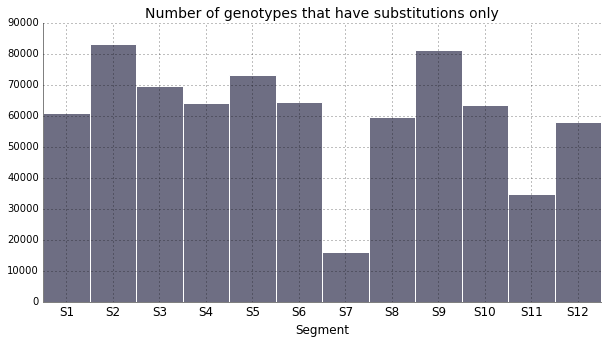

In [7]:
title = 'Number of genotypes that have substitutions only'

to_plot = [(segment_name.split('_')[0], len(segment)) for segment_name, segment in data.items()]
to_plot = zip(*to_plot)
x = np.arange(len(data))

plot_better()
bar_width = 1
plt.bar(x, to_plot[1], bar_width, edgecolor='white', color=bar_color)
plt.title(title, fontsize=14)
plt.xticks(x + bar_width/2., to_plot[0], rotation=0, fontsize=12)
plt.xlabel('Segment', fontsize=12)
save_image(image_counter, title, figures_folder, notebook_prefix)

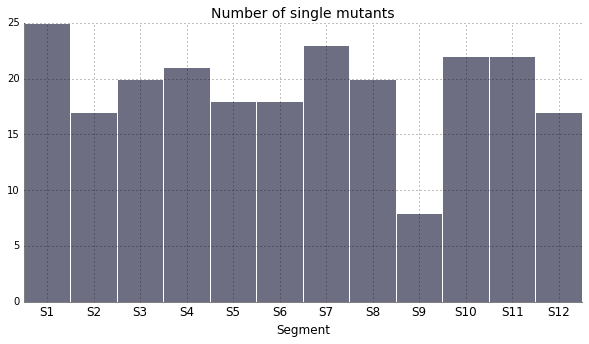

In [8]:
title = 'Number of single mutants'

to_plot = [(segment_name.split('_')[0], len(segment[segment.mut_list.str.count(':') == 0])) for segment_name, segment in data.items()]
to_plot = zip(*to_plot)
x = np.arange(len(data))

plot_better()
bar_width = 1
plt.bar(x, to_plot[1], bar_width, edgecolor='white', color=bar_color)
plt.title(title, fontsize=14)
plt.xticks(x + bar_width/2., to_plot[0], rotation=0, fontsize=12)
plt.xlabel('Segment', fontsize=12)
save_image(image_counter, title, figures_folder, notebook_prefix)

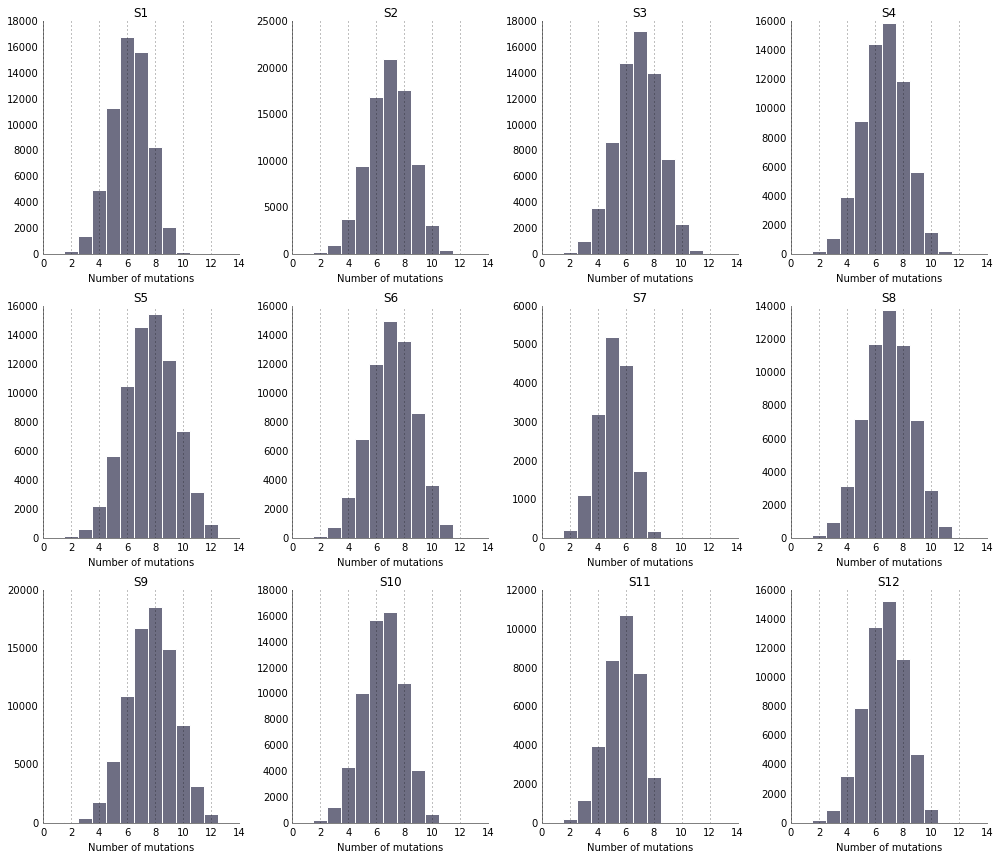

In [9]:
plot_better(width=14, height=12)
title = 'Distribution of mutants with different number of mutations'
for index, item in enumerate(data.items()):
    segment_name, segment = item
    ax = plt.subplot(3,4,index+1)
    plt.title(segment_name.split('_')[0])
    mutant_distribution = np.array([len(segment[segment.mut_list.str.count(':') == mut_number-1]) for mut_number in range(1,13)])
    width = 1
    plt.bar(np.arange(len(mutant_distribution))+width/2., mutant_distribution, width, edgecolor='white', color=bar_color)
    improve_plot(ax, grid='x')
    plt.xlabel('Number of mutations')
# plt.suptitle(title, fontsize=18)
plt.tight_layout()
save_image(image_counter, title, figures_folder, notebook_prefix)